In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON file into a DataFrame
json_file_path = "/Users/ezequielesparza/TKH-Social-Media-Engagement-Analytics/data/dataset_instagram-scraper_2023-04-11_20-38-43-027.json"
df = pd.read_json(json_file_path)
pd.set_option('display.max_columns', None)

df


,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,latestComments,dimensionsHeight,dimensionsWidth,displayUrl,images,likesCount,timestamp,childPosts,ownerFullName,ownerUsername,ownerId,isSponsored,alt,videoUrl,videoViewCount,videoPlayCount,locationName,locationId,productType,videoDuration,taggedUsers,title,description
0,3.075855e+18,Sidecar,CqvoZzULx7e,#Tech is increasingly becoming an #EssentialTo...,"[Tech, EssentialTool, jobs., TapIn, TechIndust...",[],https://www.instagram.com/p/CqvoZzULx7e/,1.0,👏🏼,"[{'id': '17980439755908690', 'text': '👏🏼', 'ow...",1080.0,1080.0,https://instagram.fntr5-1.fna.fbcdn.net/v/t51....,[https://instagram.fntr5-1.fna.fbcdn.net/v/t51...,17.0,2023-04-07 18:01:40+00:00,"[{'id': '3075854752495254239', 'type': 'Image'...",The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.070079e+18,Image,CqbHD33vMiW,Informational #interviews are essential for #c...,"[interviews, career, interviewing., ExpandOppr...",[],https://www.instagram.com/p/CqbHD33vMiW/,0.0,,[],1080.0,1080.0,https://scontent-hbe1-1.cdninstagram.com/v/t51...,[],17.0,2023-03-30 18:45:16+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.078740e+18,Video,Cq54bj-vztp,"Come on by this #Saturday, April 15th at 1pm, ...","[Saturday,, OpenHouse!, BronxEvents, NYC, NewY...",[],https://www.instagram.com/p/Cq54bj-vztp/,0.0,,[],1137.0,640.0,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,[],8.0,2023-04-11 17:35:00+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,https://instagram.fbdo9-1.fna.fbcdn.net/v/t66....,97.0,242.0,"New York, New York",212988663.0,clips,5.202,NaN,NaN,NaN
3,3.073725e+18,Image,CqoEOzPPV9h,It’s #TechTuesday! Today we'll be talking abou...,"[TechTuesday!, DayintheLife, WebDevelopment., ...",[],https://www.instagram.com/p/CqoEOzPPV9h/,1.0,Excited to give back and share with my communi...,"[{'id': '17987013259901690', 'text': 'Excited ...",1080.0,1080.0,https://scontent-lcy1-1.cdninstagram.com/v/t51...,[],17.0,2023-04-04 19:30:37+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'full_name': 'Lidia • Software Engineer •Afr...,NaN,NaN
4,3.069354e+18,Image,CqYiRTGrGDa,It's #WomenCrushWednesday and today we're chec...,"[WomenCrushWednesday, India., WomenSupportingW...",[],https://www.instagram.com/p/CqYiRTGrGDa/,1.0,"Fantastic\nphoto, we would certainly like to...","[{'id': '17996539900770096', 'text': 'Fantasti...",1080.0,1080.0,https://z-p42-instagram.fadb6-4.fna.fbcdn.net/...,[],10.0,2023-03-29 18:45:18+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2.820809e+18,Image,CclhmzLlycJ,We had a wonderful information session with @n...,"[ExpandOpportunity, Tech, TechProgram, Coding,...",[newvillagegirlsacademy],https://www.instagram.com/p/CclhmzLlycJ/,2.0,Wow 🤗 send pics @black.familye_😍,"[{'id': '17958334312681006', 'text': 'Wow 🤗 se...",810.0,1080.0,https://scontent-fra5-2.cdninstagram.com/v/t51...,[],31.0,2022-04-20 20:30:06+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2.815645e+18,Image,CcTLclmLLG7,"In honor of #nationalvolunteermonth, we are re...","[nationalvolunteermonth,, ExpandOpportunity, v...",[ayoitscrowder).],https://www.instagram.com/p/CcTLclmLLG7/,0.0,,[],1080.0,1080.0,https://instagram.fopo6-1.fna.fbcdn.net/v/t51....,[],17.0,2022-04-13 17:30:09+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2.827317e+18,Image,Cc8pXs7FC3X,It's that time of the month to announce our #S...,"[StaffoftheMonth,, ExpandOpportunity, StaffApp...",[],https://www.instagram.com/p/Cc8pXs7FC3X/,0.0,,[],1080.0,1080.0,https://scontent-mi

In [3]:
df.dtypes

id                              float64
type                             object
shortCode                        object
caption                          object
hashtags                         object
mentions                         object
url                              object
commentsCount                   float64
firstComment                     object
latestComments                   object
dimensionsHeight                float64
dimensionsWidth                 float64
displayUrl                       object
images                           object
likesCount                      float64
timestamp           datetime64[ns, UTC]
childPosts                       object
ownerFullName                    object
ownerUsername                    object
ownerId                         float64
isSponsored                     float64
alt                             float64
videoUrl                         object
videoViewCount                  float64
videoPlayCount                  float64


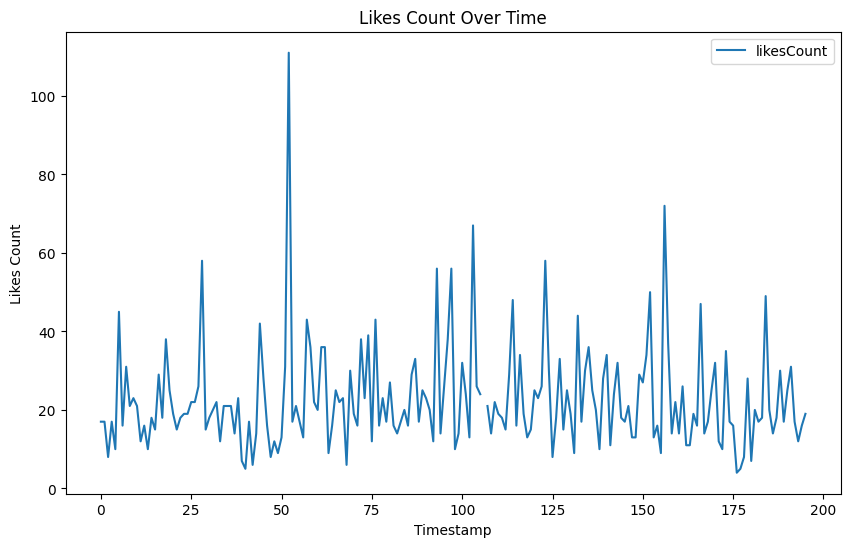

In [4]:
# likes over time 

df.plot(y='likesCount', kind='line', figsize=(10, 6))
plt.title('Likes Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Likes Count')
plt.show()

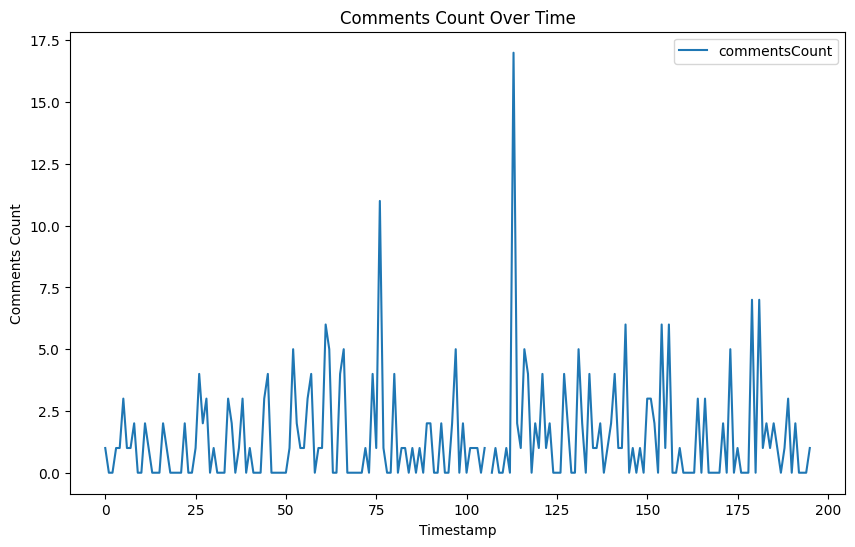

In [5]:
df.plot(y='commentsCount', kind='line', figsize=(10, 6))
plt.title('Comments Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Comments Count')
plt.show()

/var/folders/fy/fl5q9lyx5cl_4sqy67dvl7f80000gn/T/ipykernel_17939/3890756353.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.set_index('timestamp').resample('H').sum()


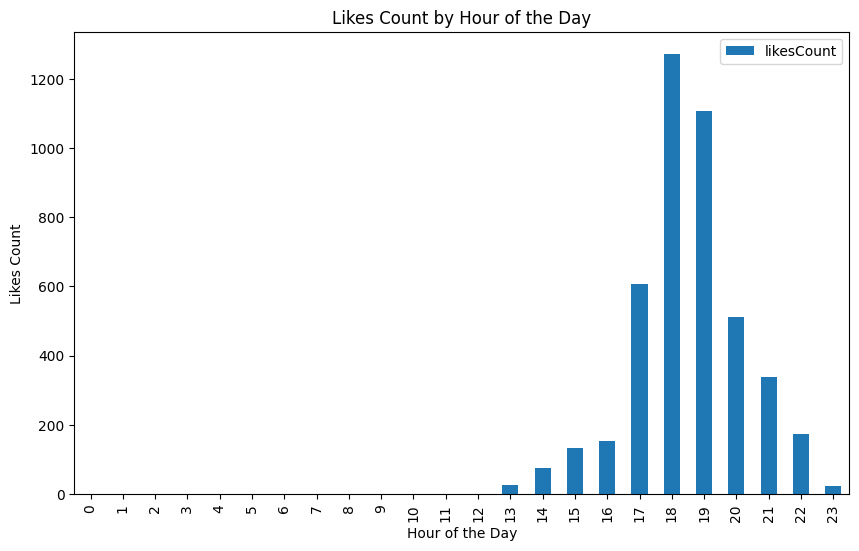

In [6]:
# convert the 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# resample the data to hourly frequency
df_resampled = df.set_index('timestamp').resample('H').sum()

# extract the hour from the timestamp and create a new column 'hour'
df_resampled['hour'] = df_resampled.index.hour

# group the data by hour and sum the 'likesCount' for each hour
df_hourly = df_resampled.groupby('hour').sum()

# plot the data
ax = df_hourly.plot(y='likesCount', kind='bar', figsize=(10, 6))
ax.set_title('Likes Count by Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Likes Count')
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
plt.show()

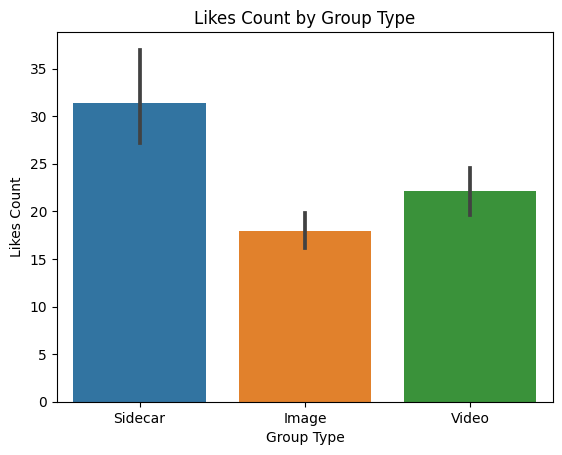

In [7]:
import seaborn as sns
# Create a bar plot using seaborn
ax = sns.barplot(x='type', y='likesCount', data=df)

# Set labels and title
ax.set_title('Likes Count by Group Type')
ax.set_xlabel('Group Type')
ax.set_ylabel('Likes Count')

# Show the plot
plt.show()

In [8]:
max_likes = df['likesCount'].max()
print("Maximum Likes Count: ", max_likes)

Maximum Likes Count:  111.0


In [9]:
df.groupby('type')['likesCount'].value_counts()

type   likesCount
Image  17.0          9
       18.0          8
       12.0          6
       14.0          6
       19.0          6
                    ..
Video  36.0          1
       39.0          1
       43.0          1
       49.0          1
       56.0          1
Name: likesCount, Length: 90, dtype: int64

In [11]:
df.describe()

,id,commentsCount,dimensionsHeight,dimensionsWidth,likesCount,ownerId,isSponsored,alt,videoViewCount,videoPlayCount,locationId,videoDuration
count,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.0,0.0,57.000000,36.000000,6.300000e+01,57.000000
mean,2.935711e+18,1.400000,1045.030769,964.902564,22.682051,1.133084e+09,0.0,NaN,153.210526,621.333333,1.823112e+14,63.882842
std,8.283304e+16,2.108891,235.728174,210.265237,13.304190,0.000000e+00,0.0,NaN,61.587840,407.830567,1.643736e+14,40.656613
min,2.812006e+18,0.000000,360.000000,480.000000,4.000000,1.133084e+09,0.0,NaN,64.000000,242.000000,2.129475e+08,5.200000
25%,2.857333e+18,0.000000,1080.000000,1080.000000,15.000000,1.133084e+09,0.0,NaN,115.000000,338.000000,2.129991e+08,39.966000
50%,2.928040e+18,1.000000,1080.000000,1080.000000,19.000000,1.133084e+09,0.0,NaN,136.000000,498.500000,3.281600e+14,59.400000
75%,3.005204e+18,2.000000,1080.000000,1080.000000,27.000000,1.133084e+09,0.0,NaN,169.000000,743.500000,3.281600e+14,89.900000
max,3.078740e+18,17.000000,1920.000000,1080.000000,111.000000,1.133084e+09,0.0,NaN,388.000000,1810.000000,3.281600e+14,154.233000


In [13]:
df.dtypes

id                              float64
type                             object
shortCode                        object
caption                          object
hashtags                         object
mentions                         object
url                              object
commentsCount                   float64
firstComment                     object
latestComments                   object
dimensionsHeight                float64
dimensionsWidth                 float64
displayUrl                       object
images                           object
likesCount                      float64
timestamp           datetime64[ns, UTC]
childPosts                       object
ownerFullName                    object
ownerUsername                    object
ownerId                         float64
isSponsored                     float64
alt                             float64
videoUrl                         object
videoViewCount                  float64
videoPlayCount                  float64
